## Raj Choudhary

## 16BCE1384

## Repository-link: https://github.com/raj1603chdry/CSE4020-MachineLearningLabs
<br /><br />

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

## Loading the data 

In [3]:
X = pd.read_csv('../datasets/ameo_dataset/processed_dataset/X.csv')
y = pd.read_csv('../datasets/ameo_dataset/processed_dataset/y_cat.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.25, random_state = 0,
                                                   stratify = y)

## Data Analysis

In [4]:
X_train.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,...,GraduationYear_2016,GraduationYear_2017,Gender_f,Gender_m,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,CollegeTier_1,CollegeTier_2
2784,97.00,95.08,89.00,440,395,545,0.493596,355,324,0,...,0,0,0,1,1,0,0,0,0,1
123,59.80,60.25,68.63,575,595,405,0.021066,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2689,72.00,73.00,70.60,405,545,280,0.062221,455,200,0,...,0,0,0,1,1,0,0,0,0,1
1645,78.00,66.60,70.00,370,300,485,0.356536,435,0,346,...,0,0,0,1,1,0,0,0,0,1
3723,72.15,67.10,70.80,535,495,645,0.694479,415,366,0,...,0,0,0,1,1,0,0,0,0,1


In [5]:
salary_classes = y_train['Salary'].unique()
print(salary_classes)

['(180000.0, 300000.0]' '(370000.0, 4000000.0]' '(34999.999, 180000.0]'
 '(300000.0, 370000.0]']


## Train the Decision Tree

In [6]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, presort = True)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best')

## Visualize the decision tree

In [7]:
export_graphviz(clf, out_file='decisiontree_ameo.dot',
                class_names=salary_classes, rounded=True, filled=True)

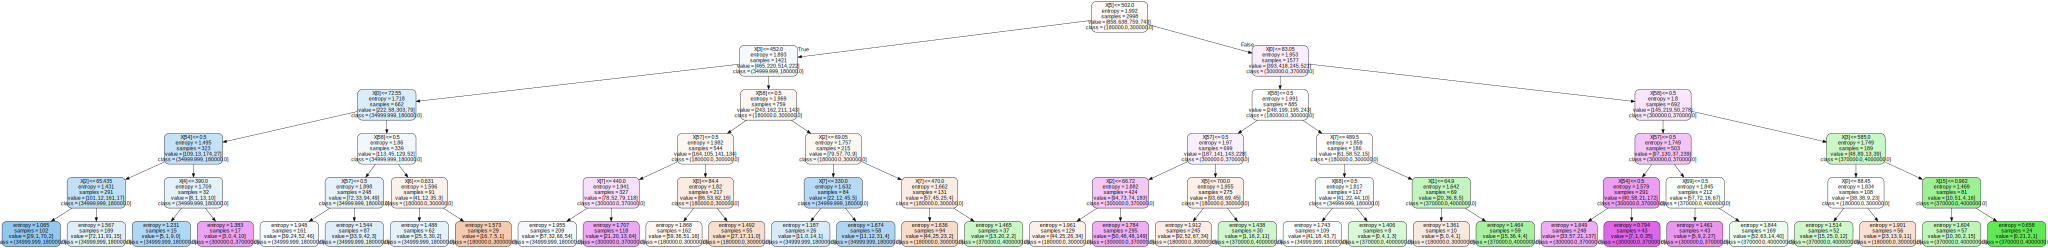

In [8]:
with open('decisiontree_ameo.dot', 'r') as f:
    tree_graph = f.read()
graphviz.render(engine='dot', format='png', filepath='decisiontree_ameo.dot')
graphviz.Source(tree_graph, engine='dot', format='png')

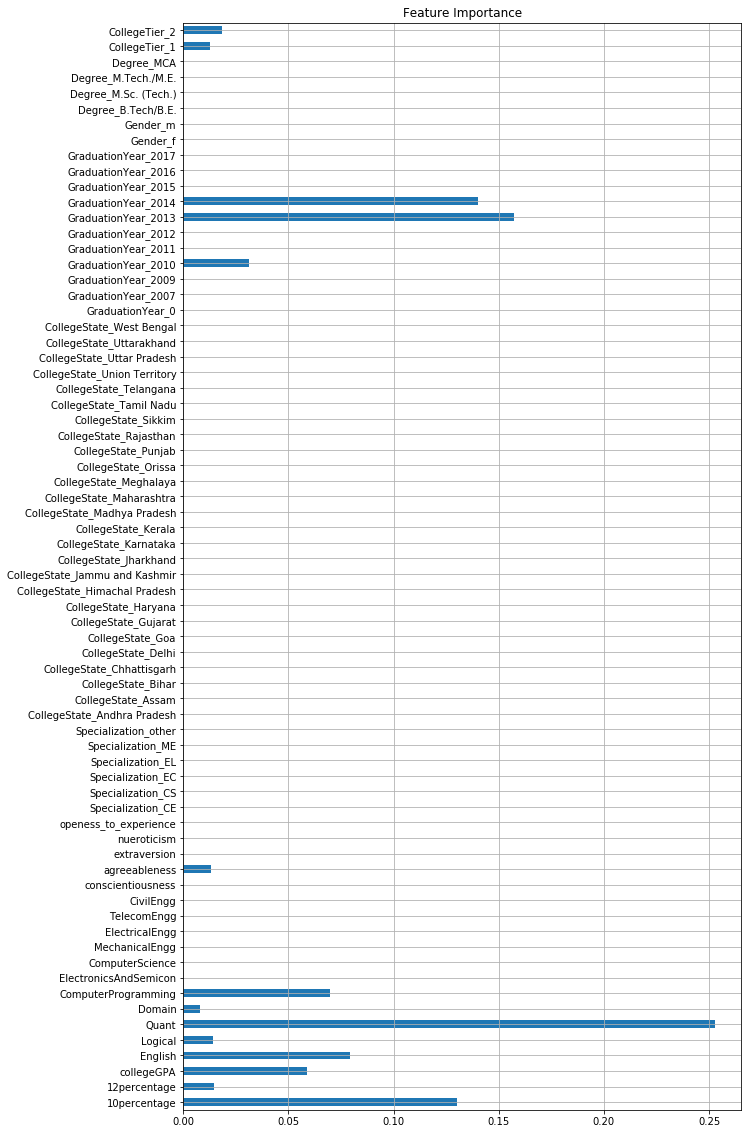

In [10]:
features_importance = pd.DataFrame(data=clf.feature_importances_.T,index=X_train.columns)
features_importance.plot.barh(figsize=(10,20), title='Feature Importance', legend=None, grid = True)

#### So from the feature importance feature of the decision tree we can see that, the most deciding factor is the Quant feature and then GraduationYear_2013, GraduationYear2014 and then 10percentage

## Classifier performance 

In [11]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

In [12]:
print('Score on training set: {:.2f}'.format(train_score))
print('Score on test set: {:.2f}'.format(test_score))

Score on training set: 0.47
Score on test set: 0.41


##### Function for plotting the confusion matrix 

In [13]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=15)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 87  50 108  41]
 [ 65  63  47  38]
 [ 75  20 126  32]
 [ 34  43  32 139]]


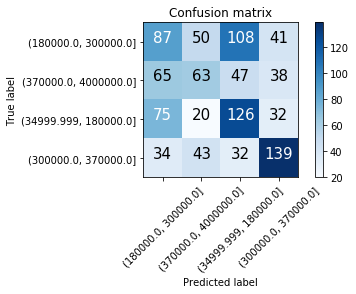

In [14]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(cnf_matrix, classes=salary_classes)

##### Predicting the F1 score 

In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, clf.predict(X_test),average='weighted')
print('F1 Score: {:.2f}'.format(f1))

F1 Score: 0.41


## Conclusion

#### We have successfully classified the candidates into 4 salary slabs with a F1 score of 0.41 